# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

Импортируем библиотеку Pandas и загрузим файл.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import warnings
warnings.simplefilter("ignore")

In [5]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

Получим информацию о датасете

In [6]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получим описание датасета в формате int

In [7]:
data.describe().astype('int')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699,23699,23699,23699,14504,23613,21796,23699,21421,12180,18157,18180,18181,8079,18181,9110,20518
mean,9,6541548,60,2,2,10,34,5,10,1,28793,14191,0,490,0,517,180
std,5,10887013,35,1,1,6,22,4,5,1,12630,8608,0,342,0,277,219
min,0,12190,12,0,1,1,2,1,1,0,0,181,0,1,0,13,1
25%,6,3400000,40,1,2,5,18,2,7,0,18585,9238,0,288,0,294,45
50%,9,4650000,52,2,2,9,30,4,9,1,26726,13098,0,455,1,502,95
75%,14,6800000,69,3,2,16,42,8,12,2,37273,16293,1,612,1,729,232
max,50,763000000,900,19,100,60,409,33,112,5,84869,65968,3,3190,3,1344,1580


Вывод:
last_price - мин. цена 12190 р., что не характерно для данного рынка. Максимальная цена 763 000 000 руб. такие значения могут негативно сказаться на среднем значении.
rooms: минимальное число комнат 0, возможно имеется ввиду студия.
ceiling_height: мин. высота потолков 1 метр, макс. - 100 метров, явно ошибка.
floors_total: макс. количество этажей 60 похоже на ошибку.
living_area: мин. жилая площадь 2 м² , также похоже на ошибку.
kitchen_area: мин. площадь кухни 1,3 м² , также похоже на ошибку.
airports_nearest: мин. расстояние до аэропорта 0 м невозможно. 
days_exposition: мин. значение 1, а макс. 1580, что, хоть и может быть реально, но негативно влияет на результат исследования.


In [8]:
data.duplicated().sum()

0

In [9]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Больше всего пропусков в is_apartment, parks_nearest, ponds_nearest, balcony, ceiling_height.
Возможно строки is_apartment не заполнялись. Пустые ячейки заполним просто False
parks_nearest и ponds_nearest можно частично дополнить данными из parks_around3000 и ponds_around3000 соответственно (предположив, что расстояние до ближайшего парка/водоема равно 3 км), а остальные значения, наверное оставим без изменений.
balcony может иметь пропуски, так как, можно предположить, что в этих квартирах балкона нет.
ceiling_height - Заполнить высоту потолков медианным значением.
airports_nearest, cityCenters_nearest - оставим без изменений, невозможно заполнить, если нету информации о точном адресе.
ponds_around3000 и parks_around3000 - пропуски могут означать отсутвие парков и прудов, поэтому заполним просто "0".
days_exposition - можем предположить, что этих данных нет, потому что объявление еще открыто.
kitchen_area и living_area - можем заполнить медианными значениями, которые будут соответствовать количеству комнат в квартире.
floors_total и locality_name - проще всего отбросить, так как невозможно ориентирвоаться на медианные или средние значения. 

Не стоит забывать об аномальных значениях (например о потолках в высоту 100 м).

[[<AxesSubplot:title={'center':'total_images'}>
  <AxesSubplot:title={'center':'last_price'}>
  <AxesSubplot:title={'center':'total_area'}>
  <AxesSubplot:title={'center':'rooms'}>]
 [<AxesSubplot:title={'center':'ceiling_height'}>
  <AxesSubplot:title={'center':'floors_total'}>
  <AxesSubplot:title={'center':'living_area'}>
  <AxesSubplot:title={'center':'floor'}>]
 [<AxesSubplot:title={'center':'kitchen_area'}>
  <AxesSubplot:title={'center':'balcony'}>
  <AxesSubplot:title={'center':'airports_nearest'}>
  <AxesSubplot:title={'center':'cityCenters_nearest'}>]
 [<AxesSubplot:title={'center':'parks_around3000'}>
  <AxesSubplot:title={'center':'parks_nearest'}>
  <AxesSubplot:title={'center':'ponds_around3000'}>
  <AxesSubplot:title={'center':'ponds_nearest'}>]
 [<AxesSubplot:title={'center':'days_exposition'}> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:>]]


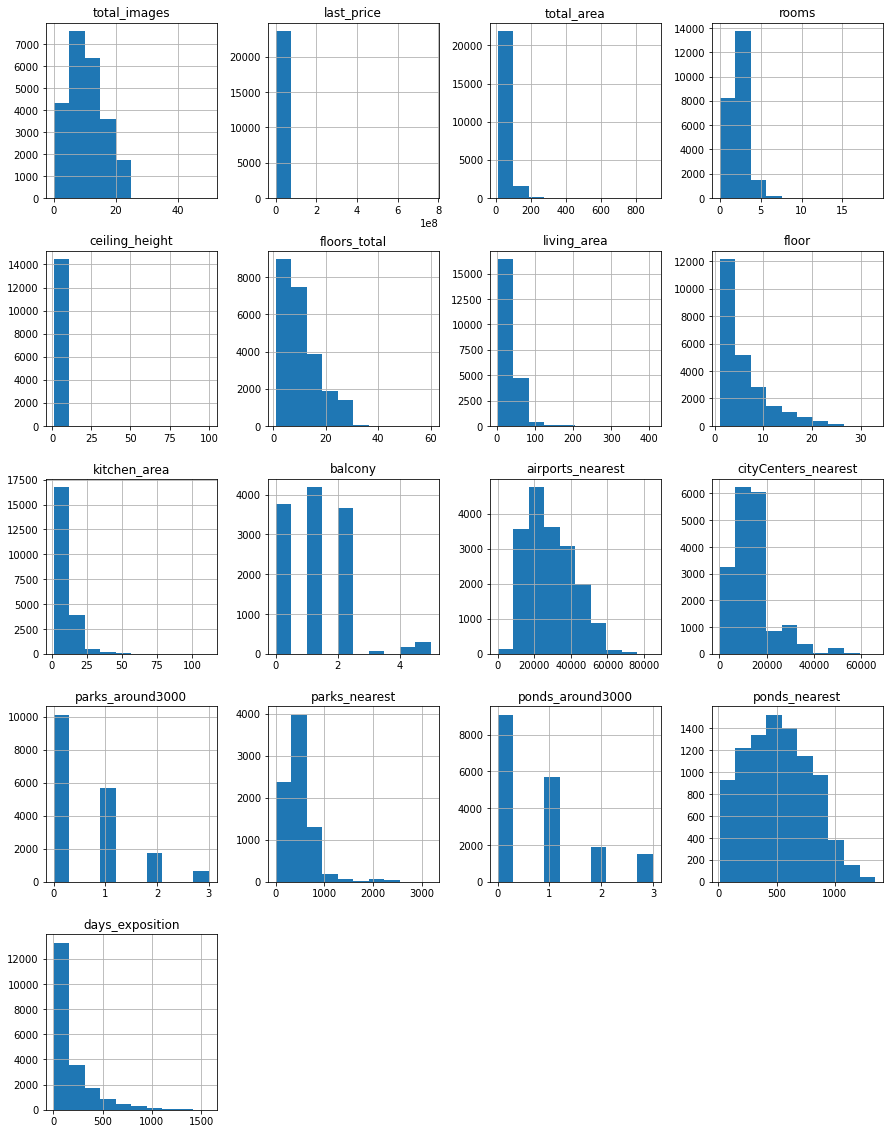

In [10]:
print(data.hist(figsize=(15, 20)));

Необходимо изменить тип данных в столбцах:
last_price: вещественное число float в int
first_day_exposition: строка object в datetime
floors_total: вещественное число float в int
is_apartment: строка object в bool
balcony: вещественное число float в int
ponds_around3000: вещественное число float в int
days_exposition: вещественное число float в int
Также стоит отметить большое количество пропусков в большинстве столбцов.

### Предобработка данных

Переименовываем столбцы и проверяем

In [11]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Заменяем пропуски в 'is_apartment' на False и проверяем

In [12]:
data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'].isna().sum()

0

Заменяем пропуски в 'balcony' на 0 и проверяем

In [13]:
data['balcony'].fillna(0, inplace=True)
data['balcony'].isna().sum()

0

Заполняем пропуски по высоте потолков медианным значением относительно населенных пунктов

In [14]:
for locality in data['locality_name'].unique():
    median_value = data.loc[data['locality_name'] == locality, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality), 'ceiling_height'].median()

data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

Заполняем пропуски по удаленности от центра медианным значением относительно населенных пунктов

Меняем тип в следующих столбцах last_price(int64), first_day_exposition(datetime), is_apartment(boolean), balcony(int64)

In [15]:
data[['last_price', 'balcony']] = data[['last_price', 'balcony']].apply(lambda x: x.astype('int64'))
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype('boolean')

In [16]:
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                   boolean
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Обрабатываем явные и неявные дубликаты

In [17]:
data.duplicated().sum()

0

In [18]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [19]:
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской посёлок Большая Ижора', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городской посёлок Советский', 'городской посёлок Фёд

In [20]:
data = data.replace({'locality_name':{'Никольское': 'село Никольское', 'городской посёлок Советский': 'посёлок городского типа Советский', 'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', 'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский', 'посёлок Рябово': 'посёлок городского типа Рябово', 'городской посёлок Мга': 'посёлок городского типа Мга', 'городской посёлок Павлово': 'посёлок городского типа Павлово', 'городской посёлок Назия': 'посёлок городского типа Назия', 'коттеджный посёлок Лесное': 'посёлок Лесное', 'Мурино': 'посёлок Мурино', 'Любань': 'посёлок Любань', 'городской посёлок Рощино': 'посёлок городского типа Рощино', 'деревня Кудрово': 'Кудрово'}})
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum()

0

В столбце ceiling_height минимальная высота потолков 1 метр,а максимальная - 100 метров, что выглядит как ошибка.
Можно заметить, что встречаются также потолки размером 20-30 метров. Что тоже аномалия. Логично предположить, что на самом деле имеется ввиду 2-3 метра, значит их нужно поделить на 10.

In [21]:
data.loc[data['ceiling_height'] >= 5, 'ceiling_height'].count()

37

In [22]:
len(data['ceiling_height'])

23650

In [23]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

In [24]:
data['ceiling_height'].describe().T

count    23650.000000
mean         2.698620
std          0.253201
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

Для наглядности постоим график

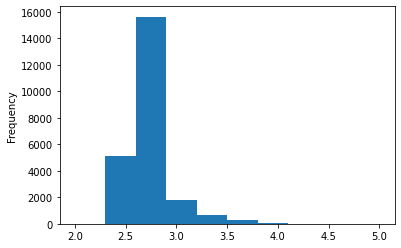

In [25]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 10, range=(2,5))
plt.show()

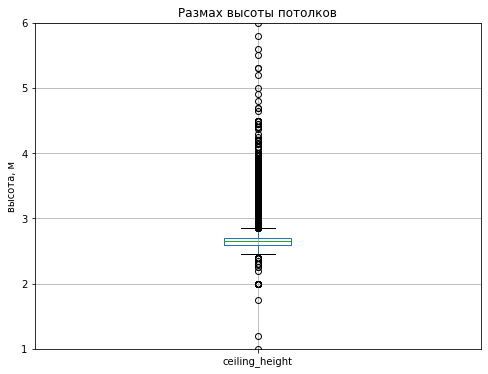

In [26]:
data.boxplot(column='ceiling_height', figsize=(8, 6))
plt.title('Размах высоты потолков')
plt.ylim(1, 6)
plt.ylabel('высота, м')
plt.show()

In [27]:
data = data.query('2.5 <= ceiling_height <= 5', engine='python')

In [28]:
data = data.query('floors_total < 30 or floors_total.isna()', engine='python')

In [29]:
data['floors_total'].max()

29.0

Вывод: 
Выполнена предобработка данных, а именно:
1)Изменены типы данных
2)Имена столбцов приведенены к единому стилю
3)Обработаны явные и неявные дубликаты
4)Обработаны пропуски
5)Добавлены результаты в таблицу

### Посчитаем и добавим в таблицу новые столбцы

Добавим столбец price_one_square_meter

In [30]:
data['price_one_square_meter'] = data['last_price'] / data['total_area']
data['price_one_square_meter'] = data['price_one_square_meter'].round(2)

Добавим столбец с днем недели, месяцем и годом публикации объявления

In [31]:
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year

Добавим столбец с ценой за кв.м

In [32]:
data['price_by_sqrm'] = data['last_price']/data['total_area']

Создадим столбцы с днем недели, месяцем и годом публицкации

In [33]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['day_of_the_week_published'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month_published'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_published'] = pd.DatetimeIndex(data['first_day_exposition']).year

Добавим столбец с категоризацией по этажам floor_category

In [34]:
def get_floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

Добавляем столбец с категорией этажа квартиры

In [35]:
data['floor_category'] = data.apply(get_floor_category, axis=1)

In [36]:
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,price_by_sqrm,day_of_the_week_published,month_published,year_published,floor_category
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,NaN,72490.85,1,3,2017,72490.845228,1,3,2017,другой
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,45.0,52542.37,0,1,2018,52542.372881,0,1,2018,другой
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,NaN,44091.71,6,2,2018,44091.710758,6,2,2018,первый
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,602.0,149511.40,1,3,2017,149511.400651,1,3,2017,другой
23698,4,1350000,32.30,2017-07-21,1,2.50,5.0,12.3,1,False,...,NaN,41795.67,4,7,2017,41795.665635,4,7,2017,первый


In [37]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

Добавлены необходимые столбцы и произвели расчеты по ним. Отметим, что из-за пропусков в исходных данных, в расчетных значениях также есть пропуски.

### Проведем исследовательский анализ данных

In [38]:
data['total_area'].describe().T

count    23529.000000
mean        60.326857
std         35.579543
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов и построим гистограмму площади

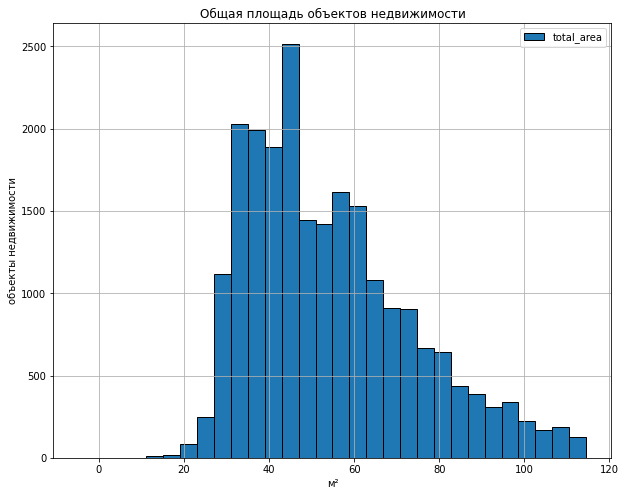

In [39]:
q1 = data['total_area'].quantile(.25) # первый квартиль Q1
q3 = data['total_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
data['total_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон до примерно 115 м², исключая выбросы. Большая часть объектов недвижимости имеют площадь от 30 до 65 м². Самый распространенный вариант - около 45 м². Площадь объектов более 100 м² встречается редко. С площадью меньше 30 м² также редкость. Среднее значение - 60 м² и медиана 52 м² сдвинуты в сторону больших значений. Их не так много, но график получается растянутым.

In [40]:
data['living_area'].describe()

count    21640.000000
mean        34.448855
std         22.018579
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов и построим гистограмму площади зала.

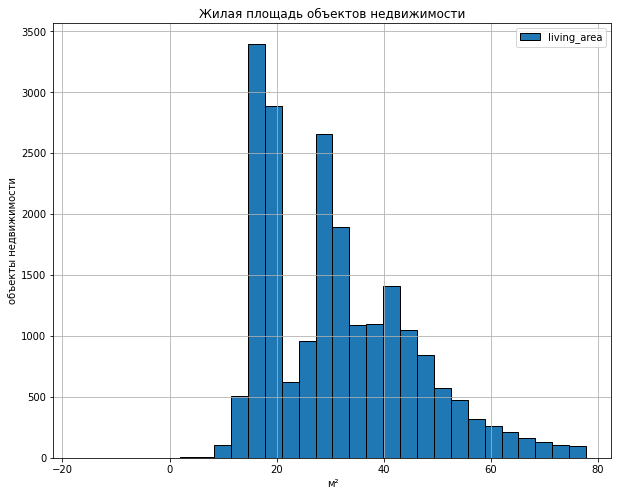

In [41]:
q1 = data['living_area'].quantile(.25) # первый квартиль Q1
q3 = data['living_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
data['living_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Жилая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон до примерно 78 м², исключая выбросы. Большая часть объектов недвижимости имеют жилую площадь от 15 до 35 м². Самый распространенный вариант - около 15 м². Жилая площадь объектов более 60 м² встречается редко. С площадью меньше 15 м² также редкость. Среднее значение - 34 м², медиана 30 м². У графика также наблюдается "хвост" из-за редких, но больших значений.

Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов и построим гистограмму площади кухни


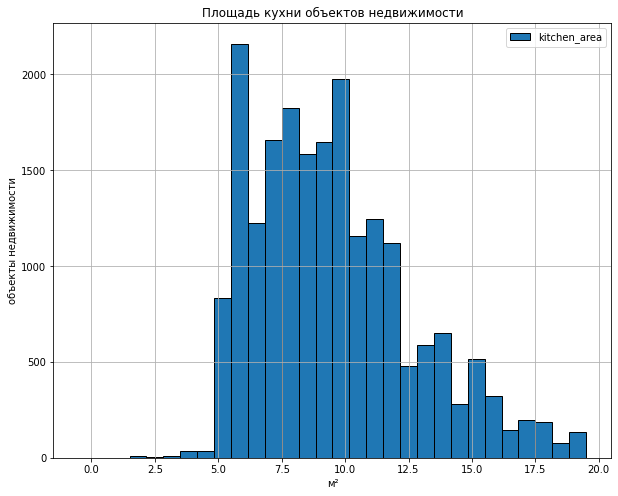

In [42]:
q1 = data['kitchen_area'].quantile(.25) # первый квартиль Q1
q3 = data['kitchen_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
data['kitchen_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Площадь кухни объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон до примерно 19 м², исключая выбросы. Большая часть объектов недвижимости имеют площадь кухни от 5,5 до 12 м². Самый распространенный вариант - около 5,5 м². Площадь кухни более 13 м² встречается редко. Площадь кухни менее 5 м² также редкость. Среднее значение - 10,5 м², медиана 9,1 м². У графика также наблюдается небольшой "хвост" из-за редких, но больших значений.

Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов и построим гистограмму цены

In [43]:
data['last_price'] = data['last_price']/1000000

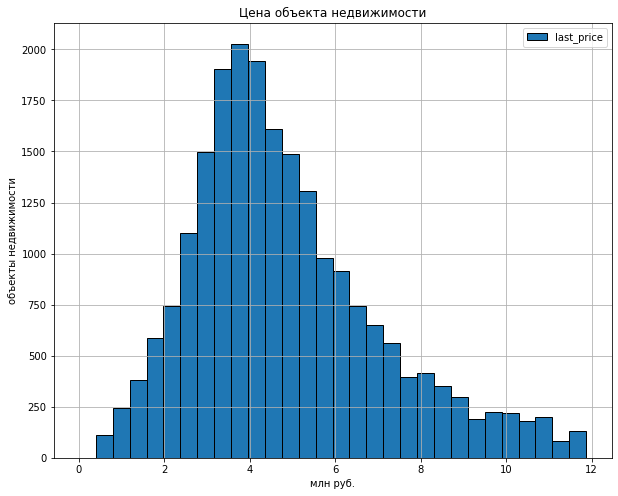

In [44]:
q1 = data['last_price'].quantile(.25) # первый квартиль Q1
q3 = data['last_price'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
data['last_price'].hist(bins=30, range=(0, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Цена объекта недвижимости')
plt.xlabel('млн руб.')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваем диапазон до примерно 12 млн руб., исключая выбросы. Большинство объектов недвижимости имеют цену в пределах от 3 до 5 млн. руб.. Самый распространенный вариант - около 3.5 млн.руб.. Вариантов с ценой более 10 млн немного. Среднее значение - 6,5 млн, медиана 4,6 млн. У графика также наблюдается небольшой "хвост" из-за редких, но больших значений.

Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов и построим гистограмму кол-ва комнат

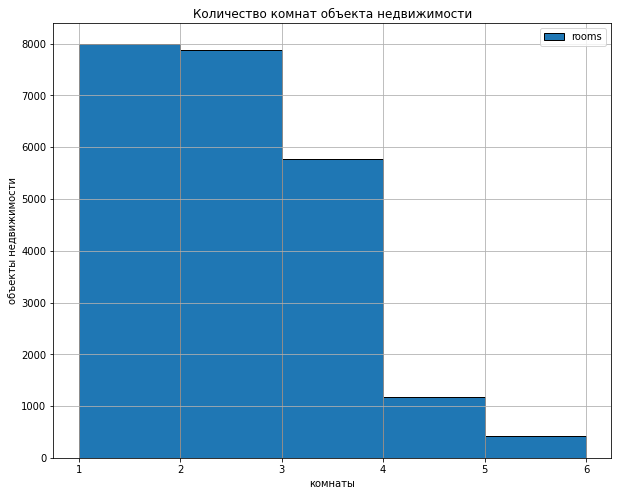

In [45]:
q1 = data['rooms'].quantile(.25) # первый квартиль Q1
q3 = data['rooms'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
data['rooms'].hist(bins=5, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Количество комнат объекта недвижимости')
plt.xlabel('комнаты')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон от 1 до 5 комнат, исключая некорректные значения (0 комнат) и выбросы. Большая часть объектов недвижимости имеют 1 или 2 комнаты, чуть меньше - 3 комнаты. Объектов, с кол-вом комнат 4-5 относительно немного. Среднее и медиана 2 комнаты точны. Крайне редкие значения (от 6 до 19 комнат) не оказывают существенного влияния на среднее значение.

Рассчитаем Q1, Q3 и IQR для построения графика без выбросов и построим гистограмму высоты потолков

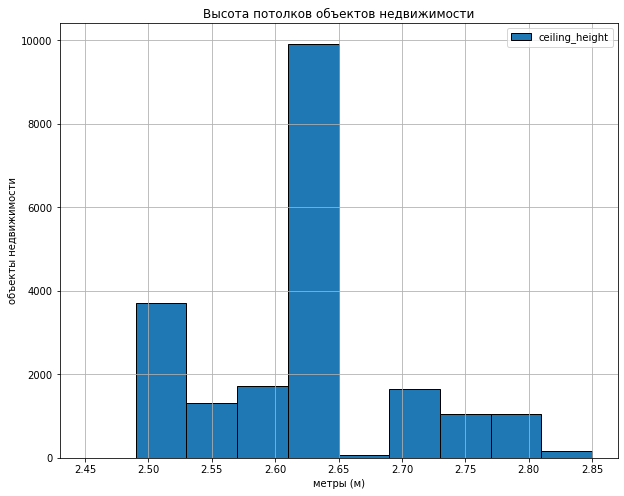

In [46]:
q1 = data['ceiling_height'].quantile(.25) # первый квартиль Q1
q3 = data['ceiling_height'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
data['ceiling_height'].hist(bins=10, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Высота потолков объектов недвижимости')
plt.xlabel('метры (м)')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваем диапазон от 2,5 до 2,85 м, исключая некорректные значения и выбросы. Большинство объектов недвижимости имеют высоту потолков 2,5 м и 2,65 м(большинство). Реже представлены варианты от 2,7м до 2,85 м. Среднее 2,7 м и медиана 2,65 точны.

Рассчитаем Q1, Q3 и IQR для построения графика без выбросов и построим гистограмму этажаности квартиры

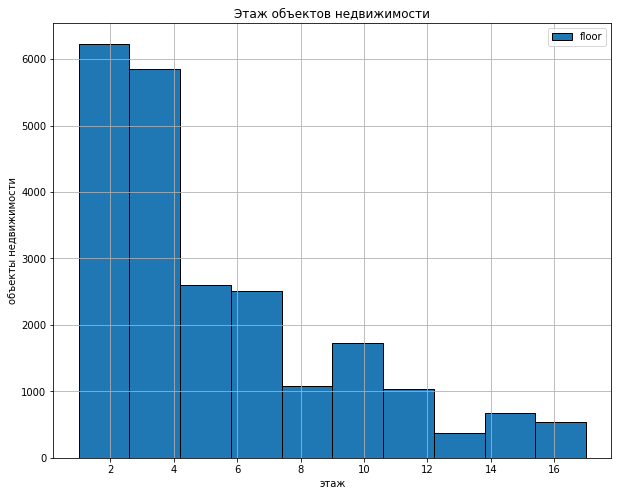

In [47]:
q1 = data['floor'].quantile(.25) # первый квартиль Q1
q3 = data['floor'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
data['floor'].hist(bins=10, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Этаж объектов недвижимости')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон с 1 по 17 этаж, исключая некорректные значения и выбросы. Большинство объектов недвижимости расположены с 1 по 4 этаж. Реже представлены варианты с 4 по 7. Среднее 5 этаж и медиана 4 этаж.

In [48]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,price_by_sqrm,day_of_the_week_published,month_published,year_published,floor_category,city_centers_nearest_km
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,120370.37,3,3,2019,120370.370370,3,3,2019,другой,16.0
1,7,3.350,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,82920.79,1,12,2018,82920.792079,1,12,2018,первый,19.0
2,10,5.196,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,92785.71,3,8,2015,92785.714286,3,8,2015,другой,14.0
3,0,64.900,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,408176.10,4,7,2015,408176.100629,4,7,2015,другой,7.0
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,100000.00,1,6,2018,100000.000000,1,6,2018,другой,8.0


In [49]:
data['floor_category'].describe().T

count      23529
unique         3
top       другой
freq       17325
Name: floor_category, dtype: object

In [50]:
data['floor_category'].value_counts()

другой       17325
последний     3307
первый        2897
Name: floor_category, dtype: int64

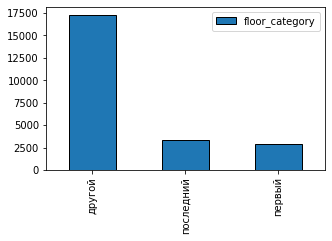

In [51]:
data['floor_category'].value_counts().plot.bar(figsize=(5, 3), ec='black', legend=True)
plt.show()

Видно, что объекты недвижимости, расположенные на первом и последним этажах имеют примерно одинаковые значения и их доля не столь велика. В основном объекты расположены на этажах между первым и последним.

Рассчитаем Q1, Q3 и IQR для построения графика без выбросов и построим гистограмму общего кол-ва этажей в доме

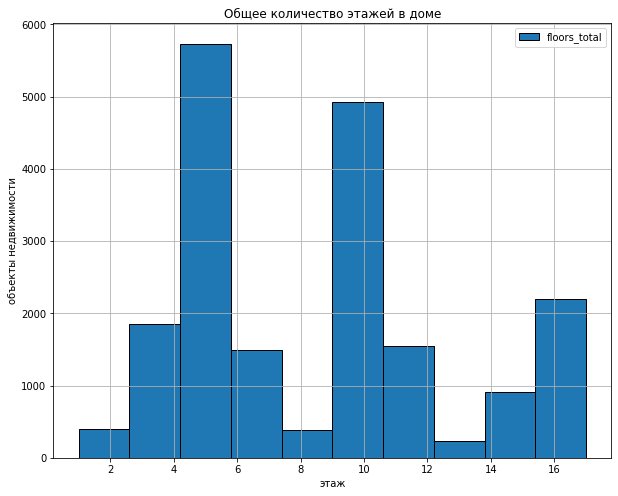

In [52]:
q1 = data['floor'].quantile(.25) # первый квартиль Q1
q3 = data['floor'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
data['floors_total'].hist(bins=10, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Общее количество этажей в доме')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон с 1 по 17 этаж, исключая некорректные значения и выбросы. Большинство объектов недвижимости - это 5-ти , 9-ти этажки. Остальные варианты представлены реже. Среднее 10 этаж и медиана 9 этаж.

Рассчитаем Q1, Q3 и IQR для построения графика без выбросов и построим гистограмму этажа квартиры

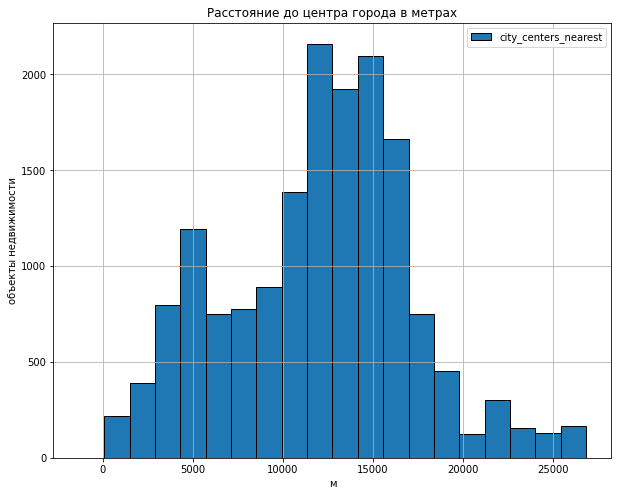

In [53]:
q1 = data['city_centers_nearest'].quantile(.25) # первый квартиль Q1
q3 = data['city_centers_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
data['city_centers_nearest'].hist(bins=20, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до центра города в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон с 3000 до 22000 м, исключая некорректные значения и выбросы. Большинство объектов недвижимости расположены на удалении 13-14 км от центра. Остальные варианты представлены реже. Среднее 13,9 км и медиана 13 км.

Уберем значени в airports_nearest равные 0 

In [54]:
data = data.query('airports_nearest != 0')

Рассчитаем Q1, Q3 и IQR для построения графика без выбросов и построим гистограмму этажа квартиры

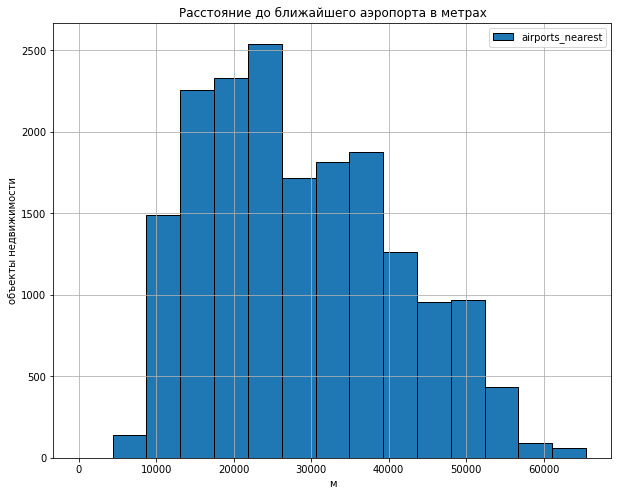

In [55]:
q1 = data['airports_nearest'].quantile(.25) # первый квартиль Q1
q3 = data['airports_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
data['airports_nearest'].hist(bins=15, range=(0, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до ближайшего аэропорта в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон с 0 до 65000 м. Большинство объектов недвижимости расположены на удалении от аэропорта на расстоянии 15-25 км. Ближайший к аэропорту объект на расстоянии 6,5 км. Среднее 28,8 км и медиана 26,7 км.

Рассчитаем Q1, Q3 и IQR для построения графика без выбросов и построим гистограмму расстояния до ближайшего парка.

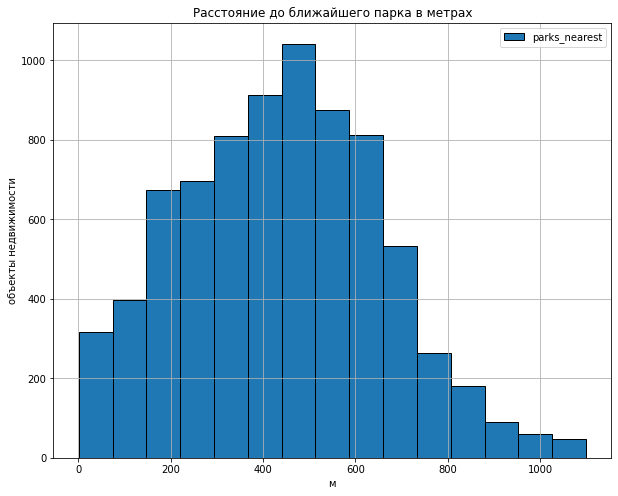

In [56]:
q1 = data['parks_nearest'].quantile(.25) # первый квартиль Q1
q3 = data['parks_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
data['parks_nearest'].hist(bins=15, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до ближайшего парка в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон с 0 до 1100 м. Большинство объектов недвижимости расположены на удалении от ближайшего парка на расстоянии 400-600м. Ближайшие к парку объект на расстоянии 500м. Среднее 490м и медиана 454м.

Посмотрим кол-во объявлений по каждому дню недели

In [57]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,price_by_sqrm,day_of_the_week_published,month_published,year_published,floor_category,city_centers_nearest_km
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,120370.37,3,3,2019,120370.370370,3,3,2019,другой,16.0
1,7,3.350,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,82920.79,1,12,2018,82920.792079,1,12,2018,первый,19.0
2,10,5.196,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,92785.71,3,8,2015,92785.714286,3,8,2015,другой,14.0
3,0,64.900,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,408176.10,4,7,2015,408176.100629,4,7,2015,другой,7.0
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,100000.00,1,6,2018,100000.000000,1,6,2018,другой,8.0


Посмотрим кол-во объявлений по каждому дню недели и отобразим это на графике

In [58]:
data['exposition_weekday'].value_counts().sort_values()

6    1678
5    1930
0    3585
2    3948
4    3970
1    4157
3    4260
Name: exposition_weekday, dtype: int64

Отобразим это на графике

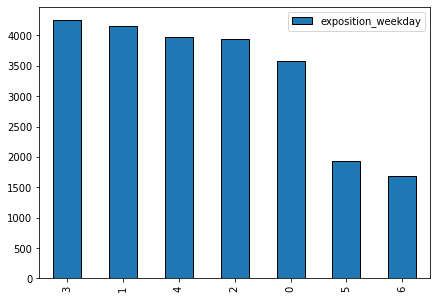

In [59]:
data['exposition_weekday'].value_counts().plot.bar(figsize=(7, 5), ec='black', legend=True)
plt.show()

Посмотрим кол-во объявлений по каждому месяцу и отобразим это на графике.

In [60]:
data['exposition_month'].value_counts().sort_values()

5     1263
1     1484
12    1632
7     1684
8     1731
6     1746
9     1968
10    2111
11    2352
4     2361
3     2570
2     2626
Name: exposition_month, dtype: int64

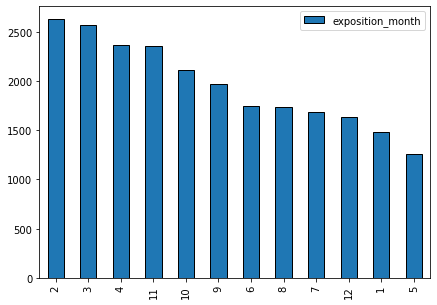

In [61]:
data['exposition_month'].value_counts().plot.bar(figsize=(7, 5), ec='black', legend=True)
plt.show()

По графику видно, что чаще всего объявления публиковали после январских праздников, в феврале. Наименьшие показатели в январе и мае. Можно предположить, что это из-за большого кол-ва выходных и праздничных дней.
Вывод: Мы получили представление о типичном объекте недвижимости из исходных данных: квартира с 1 или 2 комнатами, 5-ти или 9-ти этажка (с квартирой с 1 по 4 этаж), общей площадью около 45 м², площадью кухни около 5,5 м², с высотой потолков 2,6 м, стоимостью около 3.5 млн.руб, расположенной на удалении от центра на расстоянии 11000-16000 метров, от аэропорта на расстоянии 15000-25000 м, до ближайшего парка около 500 метров.

Изучим, как быстро продавались квартиры days_exposition. 
Этот параметр показывает, сколько дней было размещено каждое объявление.
Построим гистограмму.
Посчитаем среднее и медиану.
Проанализируем время продажи квартиры.

Рассчитаем Q1, Q3 и IQR для построения графика без выбросов и построим гистограмму времени продажи квартиры

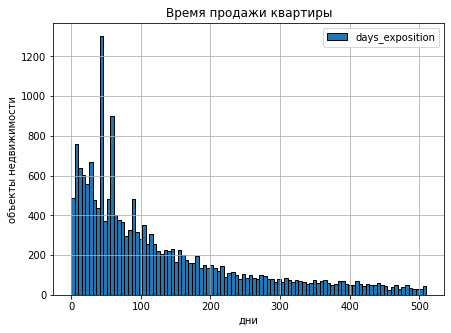

In [62]:
q1 = data['days_exposition'].quantile(.25) # первый квартиль Q1
q3 = data['days_exposition'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR 
data['days_exposition'].hist(bins=100, range=(0, (q3 + 1.5 * iqr)), figsize=(7, 5), ec='black', legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

На графике видны пики около 50-60 дней, но при таком длинном "хвосте" из данных делать выводы не уместно. Изменим масштаб - изменим период до 100 дней.

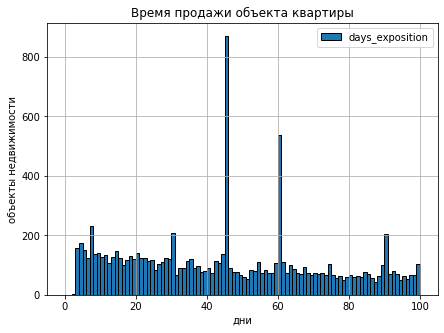

In [63]:
data['days_exposition'].hist(bins=100, range=(0, 100), figsize=(7, 5), ec='black', legend=True)
plt.title('Время продажи объекта квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

Судя по графику, чаще всего квартиры продают за 45 и 60 дней. Но тут важно учесть, что возможно квартира не продана, а просто закрылось объявление в связи с истекшим сроком публикации. Также объявление может остаться на сайте, даже если объект недвижимости уже фактически продан, просто забыли снять объявление. В этом случае если пользователь не потдвердит актуальность объявления, оно может быть автоматически удалено.
Теперь посмотрим на среднее и медиану.

In [64]:
data['days_exposition'].describe().T

count    20368.000000
mean       180.840338
std        220.007683
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи объекта недвижимости 181 день, медианное - 95 дней. Максимальное значение - 1580 дней.Смотря на график, можно увидеть длиный "хвост". Больших значений достаточно много. Среднее значение в 2 раза больше медианного. Стандартное отклонение превышает среднее значение - это говорит о большом кол-ве выбросов. Чтобы посмотреть, нужно построить диаграмму размаха.

Строим диаграмму размаха времени продажи объекта недвижимости

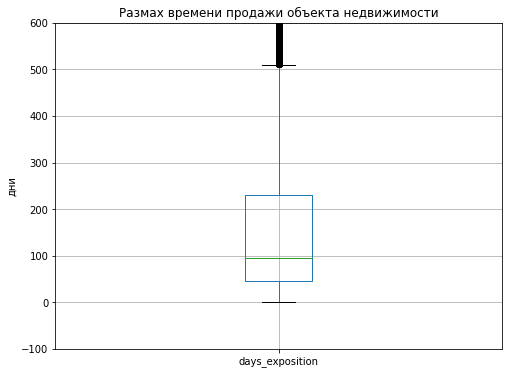

In [65]:
data.boxplot(column='days_exposition', figsize=(8, 6))
plt.title('Размах времени продажи объекта недвижимости')
plt.ylim(-100, 600)
plt.ylabel('дни')
plt.show()

Все, что выше этого значения - это выбросы

In [66]:
print(q3 + 1.5 * iqr)

510.0


In [67]:
len(data)

23528

Убираем выбросы и проверим длину датафрейма

In [68]:
data_update = data.query('days_exposition < 510')
len(data_update)

18694

In [69]:
23528-18694

4834

Вывод
Убрали из датафрейма 4834 строк, которые содержали выбросы по времени продажи объекта. Оценка времени продажи: быстрая продажа - до 45 дней, нормальная продажа - от 45 до 231 дней, долгая продажа - от 231 до 510 дней. Продажи после 510 дней - выбросы.
Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучим, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Построим графики, которые покажут зависимость цены от указанных выше параметров.

Какие факторы больше всего влияют на общую стоимость объекта?
Изучим, зависит ли цена от площади, числа комнат, удалённости от центра и количества этажей в доме.

Для начала создаем сводные таблицы, где проверим зависимость(по самым очевидным показателям) цены с площадью, с количеством комнат, с расстоянием до центра и с количеством этажей в доме, затем по этим сводным таблицам создадим графики.

In [70]:
d1 = data.pivot_table(index='total_area', values='last_price')
d1.reset_index().head()

,total_area,last_price
0,12.0,2.400
1,13.0,2.350
2,13.2,1.686
3,14.0,1.190
4,15.0,1.725


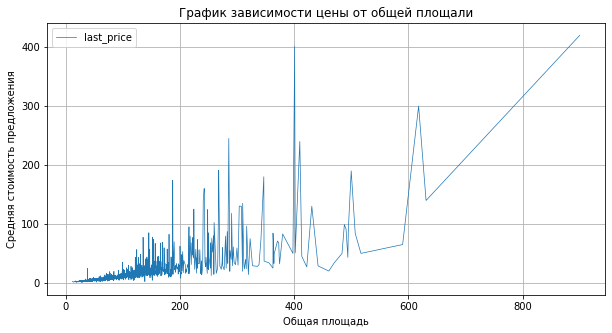

In [71]:
d1.plot(figsize=(10,5), grid=True, linewidth=0.7, title='График зависимости цены от общей площали')
plt.xlabel('Общая площадь')
plt.ylabel('Средняя стоимость предложения')
plt.show()

Тут мы можем увидеть явную зависимость цены от общей площади квартиры

In [72]:
d2 = data.pivot_table(index=['rooms'], values='last_price')
d2.reset_index().head()

,rooms,last_price
0,0,3.310782
1,1,3.833792
2,2,5.596108
3,3,8.185412
4,4,13.361235


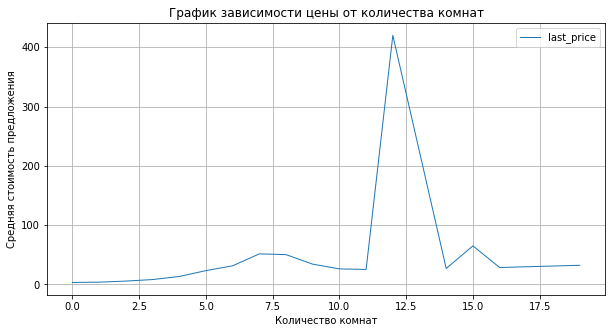

In [73]:
d2.plot(figsize=(10,5), grid=True, linewidth=1, title='График зависимости цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя стоимость предложения')
plt.show()

Здесь также видна зависимость цены от количества комнат, однако после 7 комнат цена падает, и в диапазоне с 11 до 13 комнат происходит аномальный выброс.

In [74]:
d3 = data.pivot_table(index='city_centers_nearest', values='last_price')
d3.reset_index().head()

,city_centers_nearest,last_price
0,181.0,31.099
1,208.0,5.800
2,215.0,10.990
3,287.0,9.590
4,291.0,11.500


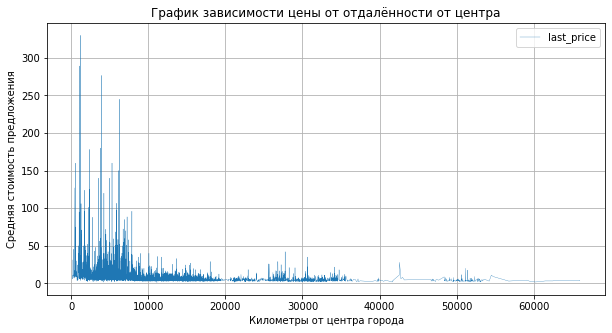

In [75]:
d3.plot(figsize=(10,5), grid=True, linewidth=0.3, title='График зависимости цены от отдалённости от центра')
plt.xlabel('Километры от центра города')
plt.ylabel('Средняя стоимость предложения')
plt.show()

Отдаленность от центра уже менее влияет на стоимость квартиры, однако, можем заметить, что чем ближе к центру, тем чаще можно заметить дорогие квартиры.

In [76]:
d4 = data.pivot_table(index='floor', values='last_price')
d4.reset_index().head()

,floor,last_price
0,1,4.807878
1,2,6.169187
2,3,6.688469
3,4,7.153948
4,5,6.619176


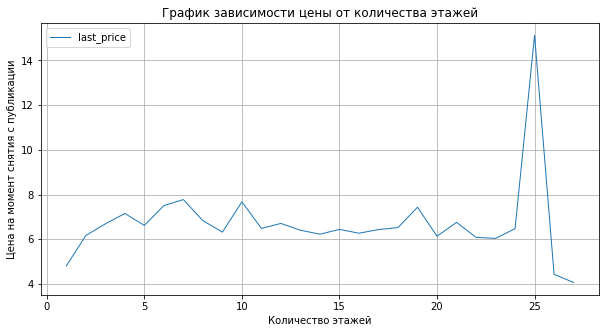

In [77]:
d4.plot(figsize=(10,5), grid=True, linewidth=1, title='График зависимости цены от количества этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

Тут мы можем увидеть, что количетво этажей не влияет на стоимость квартиры.

In [78]:
df = data.pivot_table(index='last_price', values=['total_area', 'rooms','city_centers_nearest', 'floor'])

array([[<AxesSubplot:xlabel='city_centers_nearest', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='floor', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='city_centers_nearest'>],
       [<AxesSubplot:xlabel='city_centers_nearest', ylabel='floor'>,
        <AxesSubplot:xlabel='floor', ylabel='floor'>,
        <AxesSubplot:xlabel='rooms', ylabel='floor'>,
        <AxesSubplot:xlabel='total_area', ylabel='floor'>],
       [<AxesSubplot:xlabel='city_centers_nearest', ylabel='rooms'>,
        <AxesSubplot:xlabel='floor', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>],
       [<AxesSubplot:xlabel='city_centers_nearest', ylabel='total_area'>,
        <AxesSubplot:xlabel='floor', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_ar

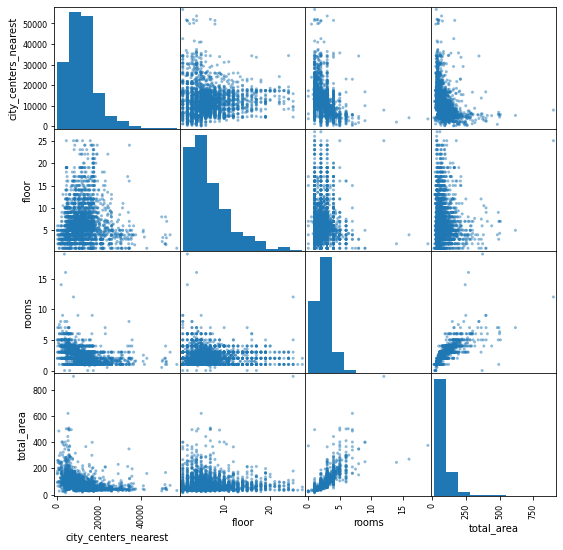

In [79]:
pd.plotting.scatter_matrix(df, figsize=(9, 9))  

Вывод: видно, что наибольшая положительная линейная связь между стоимостью квартиры и ее площадью. Зависимость прямопропорциональная - чем больше стоимость квартиры, тем больше ее площадь. Положительная линейная связь отмечается также между стоимостью квартиры и количеством комнат. Соответственно чем количество комнат больше, тем больше стоимость квартиры. Слабую отрициательную линейную связь можно заметить между стоимостью квартиры и расстоянием до центра города. Чем меньше расстояние до центра, тем больше стоимость квартиры.

Далее проанализируем неочевидные параметры и их влияние на стоимость квартиры.

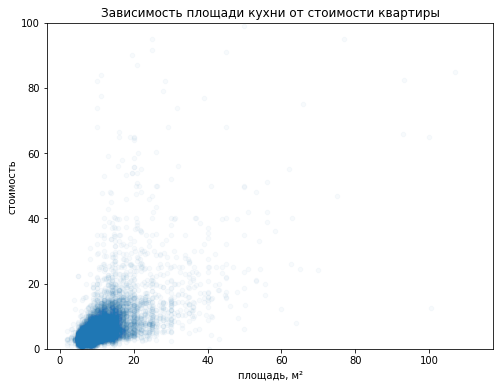

In [80]:
data_update.plot(x='kitchen_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость площади кухни от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость')
plt.ylim(0, 100)
plt.show()

Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью кухни до 18 м². Зависимость прямопропорциональная - чем больше площадь кухни, тем выше ее стоимость.

,mean,count,median
first_day_exposition,,,
2015-02-19,5.095000,2,5.095000
2015-02-26,7.700000,1,7.700000
2015-03-08,7.531696,2,7.531696
2015-03-09,8.931645,1,8.931645
2015-03-10,6.233148,1,6.233148
...,...,...,...
2019-04-25,4.325000,2,4.325000
2019-04-26,7.385000,2,7.385000
2019-04-29,6.100000,1,6.100000


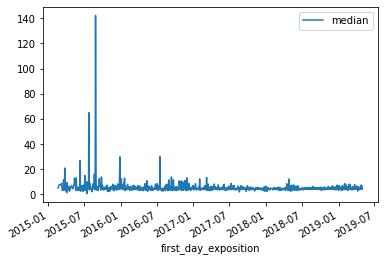

In [81]:
# Создаем сводную таблицу
pivot_table_floor_category = data_update.pivot_table(index = 'first_day_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# Присваиваем названия колонкам
pivot_table_floor_category.columns = ['mean', 'count', 'median']
#Строим зависимость
pivot_table_floor_category.plot(y = 'median', legend=True)
#Выводим
pivot_table_floor_category

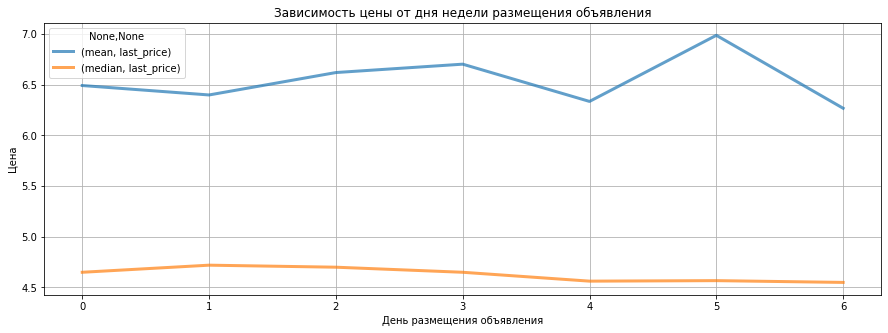

In [82]:
data.pivot_table(index=['exposition_weekday'], values='last_price', aggfunc=['mean', 'median']) \
          .plot(grid=True,linewidth=3, alpha=0.7,figsize=(15,5), title='Зависимость цены от дня недели размещения объявления')

plt.xlabel('День размещения объявления')
plt.ylabel('Цена')
plt.show()

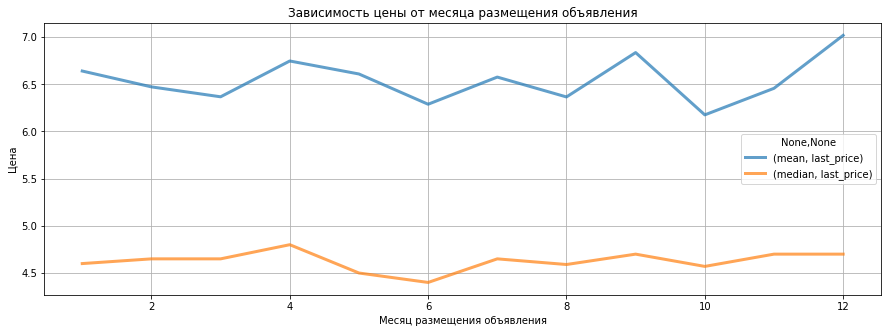

In [83]:
data.pivot_table(index=['exposition_month'], values='last_price', aggfunc=['mean', 'median']) \
          .plot(grid=True,linewidth=3, alpha=0.7,figsize=(15,5), title='Зависимость цены от месяца размещения объявления')

plt.xlabel('Месяц размещения объявления')
plt.ylabel('Цена')
plt.show()

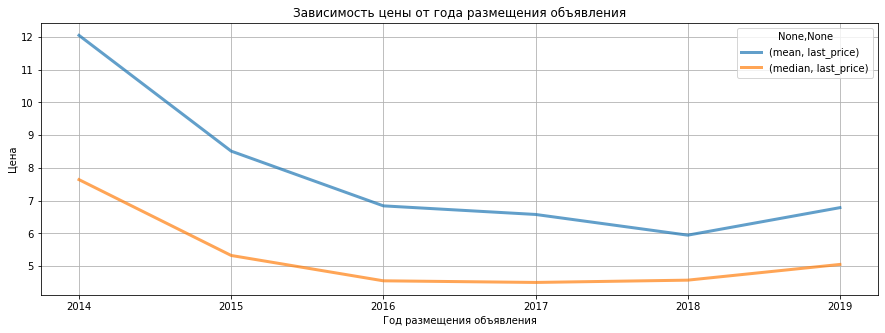

In [84]:
data.pivot_table(index=['exposition_year'], values='last_price', aggfunc=['mean', 'median']) \
          .plot(grid=True,linewidth=3, alpha=0.7,figsize=(15,5), title='Зависимость цены от года размещения объявления')

plt.xlabel('Год размещения объявления')
plt.ylabel('Цена')
plt.show()

Зависимоть между днем недели, месяцем и стоимостью квартир отсутствует.Однако есть зависимость по годам, где мы видим, что старые объявления имели более высокую цену чем новые. Объявления, опубликованные до 2016 года , особенно выделяются по ценовому диапазону.

,mean,count,median
floor_category,,,
другой,6.221423,13935,4.6500
первый,4.443680,2226,3.7995
последний,6.806838,2533,4.2000


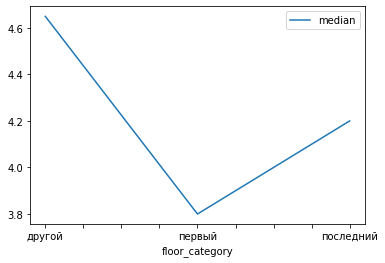

In [85]:
# Создаем сводную таблицу
pivot_table_floor_category = data_update.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# Присваиваем названия колонкам
pivot_table_floor_category.columns = ['mean', 'count', 'median']
#Строим зависимость
pivot_table_floor_category.plot(y = 'median', legend=True)
#Выводим
pivot_table_floor_category

Из графика видно, что медианное значение для квартир на первом этаже минимальное. Максимальное медианное значение стоимости квартир - для квартир отличных от первого и последнего этажа.
ВЫВОД: На общую (полную) стоимость объекта больше всего влияет общая площадь квартиры и этаж расположения квартиры. Чем больше площадь, тем выше стоимость. На первом и последнем этажах стоимость квартиры меньше, чем на остальных. Дата публикации объявления на стоимость не влияет.

Далее посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

ТОП 10 населенных пунктов с наибольшим числом объявлений

In [86]:
top_10_localities = data_update['locality_name'].value_counts().head(10)
top_10_localities

Санкт-Петербург      12408
посёлок Мурино         518
Кудрово                406
посёлок Шушары         388
Всеволожск             308
Колпино                293
посёлок Парголово      287
Пушкин                 276
Гатчина                244
Выборг                 191
Name: locality_name, dtype: int64

Выведем среднюю цену за кв м по топ 10 населенным пунктам

In [87]:
top_10_localities_pivot = data_update.query('locality_name in @top_10_localities.index').pivot_table(index='locality_name', values='price_one_square_meter')
top_10_localities_pivot.sort_values(by='price_one_square_meter', ascending=False)

,price_one_square_meter
locality_name,
Санкт-Петербург,111664.992440
Пушкин,101936.484457
Кудрово,94567.754335
посёлок Парголово,89192.878502
посёлок Мурино,85962.868398
посёлок Шушары,77914.528144
Колпино,74768.674642
Всеволожск,68605.620519
Гатчина,68065.179549


Отобразим на графике среднюю цену квадратного метра в топ 10 населенных пунктах

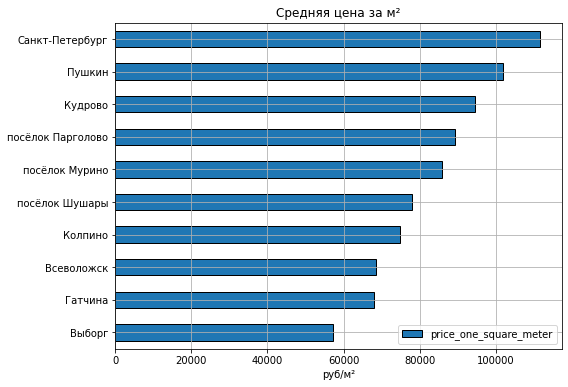

In [88]:
top_10_localities_pivot.sort_values(by='price_one_square_meter').plot(kind='barh', legend=True, grid=True, ec='black', figsize=(8, 6))
plt.title('Средняя цена за м²')
plt.xlabel('руб/м²')
plt.ylabel('')
plt.show()

Вывод: Из графика видно, что наибольшая средняя цена за 1 квадратный метр в Санкт-Петербурге(111722 руб.), что логично. Следом по стоимости идет Пушкин(101894 руб.), что тоже логично - много исторических мест, парков и расположен к городу ближе, чем, например, Гатчина и Выборг. Наименьшая цена за квадратный метр в Выборге(57011 руб.).
Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишим, как стоимость объектов зависит от расстояния до центра города.

In [89]:
df_spb = data_update.query('locality_name == "Санкт-Петербург"')
df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,price_by_sqrm,day_of_the_week_published,month_published,year_published,floor_category,city_centers_nearest_km
3,0,64.90,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,408176.10,4,7,2015,408176.100629,4,7,2015,другой,7.0
4,2,10.00,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,100000.00,1,6,2018,100000.000000,1,6,2018,другой,8.0
9,18,5.40,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,88524.59,6,2,2017,88524.590164,6,2,2017,другой,15.0
10,5,5.05,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,127525.25,3,11,2017,127525.252525,3,11,2017,другой,14.0
15,16,4.65,39.0,2017-11-18,1,2.65,14.0,20.5,5,False,...,119230.77,5,11,2017,119230.769231,5,11,2017,другой,14.0


In [90]:
len(df_spb)

12408

12408 Объявлений из Санкт-Петербурга. Определим центр с помощью стоимости квадратного метра. Построим график. Та точка, после которой пойдет явный спад в стоимости и будем считать за границы центра города.

Рассчитаем среднюю цену квадратного метра до центра

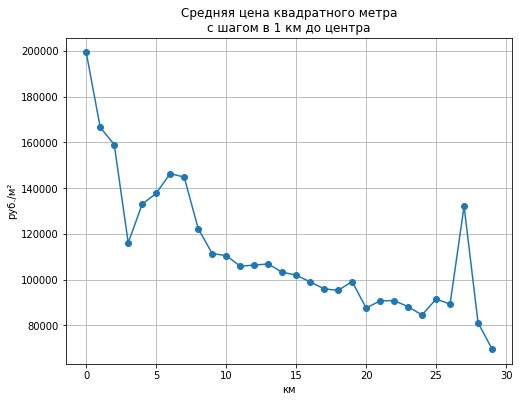

In [91]:
(df_spb.pivot_table(index='city_centers_nearest_km', values='price_one_square_meter').plot(marker='o', grid=True, figsize=(8, 6), legend=False))
plt.title('Средняя цена квадратного метра\nс шагом в 1 км до центра')
plt.xlabel('км')
plt.ylabel('руб./м²')
plt.show()

Из графика можно заметить, что после 8-го километра форма графика становится линейной и стоимость начинается уменьшаться. Максимальная стоимость в зоне у самого центра(до 1 км). Пик в районе 27 км - возможен из-за класса жилья - элитное.

### Общий вывод

Наибольшее влияние на стоимость квартиры оказывает её площадь: чем больше площадь квартиры, тем выше её стоимость, а также на стоимость квартиры влияет и количество комнат: чем больше комнат, тем выше стоимость. На стоимость квартиры также влияет расстояние до центра города: чем ближе квартира располагается к центру, тем выше ее стоимость. По результатам исследования приняли, что зона центра города распространяется на 8 км. Также мы установили, что объявление до 2016 года имели более высокую стоимость.
Мы получили представление о типичном объекте недвижимости: квартира с 1 или 2 комнатами, 5-ти или 9-ти этажка (с квартирой с 1 по 4 этаж), общей площадью около 45 м², площадью кухни около 5,5 м², с высотой потолков 2,6 м, стоимостью около 3.5 млн.руб, расположенной на удалении от центра на расстоянии 11-16 км, от аэропорта на расстоянии 15-25 км, до ближайшего парка около 500 метров.
Ожидаемое время продажи объекта недвижимости - от 45 до 231 день.
Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге - 111 665 руб./м² (топ-10 населенных пунктов по количеству объявлений).
Самая низкая средняя стоимость квадратного метра в Выборге - 57 011 руб./м² (топ-10 населенных пунктов по количеству объявлений).